### project 01. 네이버 뉴스 웹사이트 크롤링 후 API로 전달
 

#### 크롤링 [네이버 뉴스](https://news.naver.com/) 
- 도구 : 셀레늄
    -  네이버 뉴스에서 최대한 많은 뉴스를 크롤링 가능한지 (ex. 업스테이지)
        - 네이버 뉴스에서 크롤링 가능한지
        - 최대한 많은 뉴스를 크롤링 할 수 있는지

- visual studio code
- python 3.11.7
- selenium 4.19.0
- APScheduler 3.10.4

In [ ]:
# %pip install apscheduler

In [ ]:
# %pip install schedule

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from selenium.webdriver.common.keys import Keys
# import schedule
import time
from apscheduler.schedulers.blocking import BlockingScheduler

In [1]:
# 실행할 함수 선언

def news_crawling() :
    # (1) 링크 생성 (네이버 뉴스)
    # keyword = input("수집하고자 하는 앱 이름을 입력하세요 :")
    keyword = '"upstage"'
    url = f'https://search.naver.com/search.naver?where=news&ie=utf8&sm=nws_hty&query={keyword}'

    # (2-1) 브라우저를 
    browser = webdriver.Chrome()
    time.sleep(3)

    # (2-2)  페이지 이동
    browser.get(url)
    time.sleep(3)

    # (3) 주단위 선택(1주)
    browser.find_element(By.XPATH, '//*[@id="snb"]/div[1]/div/div[2]/a').click()
    browser.find_element(By.XPATH, '//*[@id="snb"]/div[2]/ul/li[3]/div/div[1]/a[4]').click()

    # (4) 뉴스기사 스크랩
    parent = browser.find_element(By.CLASS_NAME, "list_news._infinite_list").find_elements(By.CLASS_NAME, "bx")

    news_list = []

    for elem in parent:
        
        company = elem.find_element(By.CLASS_NAME, "info.press").text
        headline = elem.find_element(By.CLASS_NAME, "news_contents").find_element(By.CLASS_NAME, "news_tit").text
        News_summary = elem.find_element(By.CLASS_NAME, "news_contents").find_element(By.CLASS_NAME, "api_txt_lines.dsc_txt_wrap").text
        link = elem.find_element(By.CLASS_NAME, "news_contents").find_element(By.CLASS_NAME, "news_tit").get_attribute('href')

        news_list.append({
            "발행사": company, 
            "제목": headline, 
            "요약": News_summary, 
            "주소" : link   
        })

    # (5) 데이터 프레임 및 저장
    df = pd.DataFrame(news_list)
    df.to_csv(f'{keyword}.csv', encoding = 'utf-8-sig')





In [ ]:

# 스케줄러 인스턴스 생성
scheduler = BlockingScheduler()

# 매일 정해진 시간에 작업 예약
scheduler.add_job(news_crawling, 'cron', hour=8, minute=0)  # 매일 오전 8시 00분에 실행

# 스케줄러 시작
scheduler.start()

In [ ]:
# 무한실행됨;;
# 함수실행
# schedule.every(1).day.do(news_crawling)

# while True:
#     schedule.run_pending()
#     time.sleep(1)

In [2]:
# # (1) 링크 생성 (네이버 뉴스)

# keyword = input("수집하고자 하는 앱 이름을 입력하세요 : ")
# url = f'https://search.naver.com/search.naver?where=news&ie=utf8&sm=nws_hty&query={keyword}'


In [3]:
# # (2) 브라우저를 열고, 페이지 이동
# browser = webdriver.Chrome()

# browser.get(url)

In [ ]:
# # (3) 주단위 선택(1주)
# browser.find_element(By.XPATH, '//*[@id="snb"]/div[1]/div/div[2]/a').click()
# browser.find_element(By.XPATH, '//*[@id="snb"]/div[2]/ul/li[3]/div/div[1]/a[4]').click()

In [10]:
# # 스크롤 다운(필요시 사용)
# """ 
# body = browser.find_element(By.CSS_SELECTOR,'body')

# for i in range(4):
#     body.send_keys(Keys.PAGE_DOWN)
# """

In [11]:
# # (4) 뉴스기사 스크랩
# parent = browser.find_element(By.CLASS_NAME, "list_news._infinite_list").find_elements(By.CLASS_NAME, "bx")

# news_list = []

# for elem in parent:
    
#     company = elem.find_element(By.CLASS_NAME, "info.press").text
#     headline = elem.find_element(By.CLASS_NAME, "news_contents").find_element(By.CLASS_NAME, "news_tit").text
#     News_summary = elem.find_element(By.CLASS_NAME, "news_contents").find_element(By.CLASS_NAME, "api_txt_lines.dsc_txt_wrap").text
#     link = elem.find_element(By.CLASS_NAME, "news_contents").find_element(By.CLASS_NAME, "news_tit").get_attribute('href')

#     news_list.append({
#         "발행사": company, 
#         "제목": headline, 
#         "요약": News_summary, 
#         "주소" : link   
#     })

In [13]:
# # 데이터 프레임 및 저장
# df = pd.DataFrame(news_list)
# df.to_csv(f'{keyword}.csv', encoding = 'utf-8-sig')

In [134]:
# # 발행사
# browser.find_element(By.CLASS_NAME, "info.press").text

'매일경제'

In [87]:
# 게시일
# browser.find_element(By.CLASS_NAME, "info_group").text

'머니투데이17면 1단1일 전네이버뉴스'

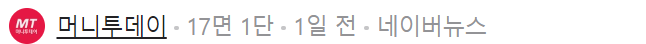
  
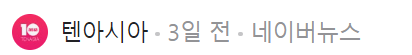

게시일 위치가 달라서 우선은 패스할게요ㅜㅜ

In [135]:
# # 헤드라인
# browser.find_element(By.CLASS_NAME, "news_contents").find_element(By.CLASS_NAME, "news_tit").text

'Law&Company teams up with Upstage to boost legal AI services'

In [136]:
# #링크
# browser.find_element(By.CLASS_NAME, "news_contents").find_element(By.CLASS_NAME, "news_tit").get_attribute('href')

'https://www.mk.co.kr/article/10962970'

In [137]:
# # 요약
# browser.find_element(By.CLASS_NAME, "news_contents").find_element(By.CLASS_NAME, "api_txt_lines.dsc_txt_wrap").text

', operator of legal services platform LawTalk, is partnering with an artificial intelligence (AI) startup Upstage Co. to expand its presence in South Korea. The partnership comes as U.S.-based LexisNexis is set to launch its AI solution in Korea next week. is known...'